In [1]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import fetch_california_housing

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [3]:
target = pd.DataFrame(housing.target, columns=['MEDV'])
data = pd.concat([df, target], axis=1)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.3, random_state=46)

model = DecisionTreeRegressor(random_state=42)

model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [5]:
y_pred = model.predict(X_test)
y_pred[0:5]

array([3.512, 1.539, 1.324, 1.75 , 2.961])

In [ ]:
print(f'Mean squared error:{mean_squared_error(y_test,y_pred)}')
print(f'R-squared:{r2_score(y_test,y_pred)}')

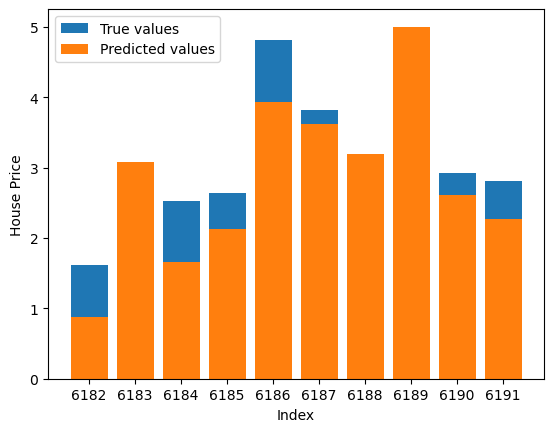

In [10]:
indices = range(len(y_test)-10, len(y_test))
y_test10 = y_test.iloc[indices]
y_pred10 = y_pred[indices]

fig, ax = plt.subplots()
ax.bar(range(len(y_test10)), y_test10['MEDV'], label='True values')
ax.bar(range(len(y_pred10)), y_pred10, label='Predicted values')
ax.set_xticks(range(len(y_test10)))
ax.set_xticklabels(indices)
ax.set_xlabel('Index')
ax.set_ylabel('House Price')
ax.legend()
plt.show()